In [2]:
from scapy.all import *
import pandas as pd 
import numpy as np 
import binascii
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline
from scapy.layers.inet import *

# Laboratorio 5
### Ricardo Valenzuela - Sara Zavala

## Cargar archivo pcap

In [7]:
pcap_file = "analisis_paquetes.pcap"

In [8]:
info = rdpcap(pcap_file)

### Capturar 100 paquetes

In [9]:
amount_of_packets = 100
pcap = sniff(count = amount_of_packets)
print("Tipo pcap: ",type(pcap))
print("Largo pcap: ", len(pcap))
print(pcap)

Tipo pcap:  <class 'scapy.plist.PacketList'>
Largo pcap:  100
<Sniffed: TCP:67 UDP:29 ICMP:0 Other:4>


### Añada al pcap de 100 paquetes el archivo analisis_paquetes.pcap 

In [10]:
pcap = pcap + info
print(pcap)

<Sniffed+analisis_paquetes.pcap: TCP:67 UDP:91 ICMP:0 Other:4>


### Convierta el pcap a un DataFrame 

In [14]:
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

dataframe_fields = ip_fields + ["time"] + tcp_fields + ['payload','payload_raw','payload_hex']

df = pd.DataFrame(columns = dataframe_fields)

for packet in pcap[IP]:
    field_values = []
    for field in ip_fields:
        if field == "options":
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    field_values.append(packet.time)
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field =="options":
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)


In [17]:
# pcap_file = rdpcap('analisis_paquetes.pcap')
# df = create_dataframe(pcap_file)

df = df.reset_index()
df = df.drop(columns="index")
df.head(10)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,184,257,788,DF,0,64,6,0,...,5,0,PA,33,13670,0,0,217,b'\x17\x03\x03\x00\xd4\r\xd8\xd2[\xf4\xc2>\xf9...,b'17030300d40dd8d25bf4c23ef91ba044aab7c7ea61ab...
1,4,5,0,40,15920,DF,0,48,6,37138,...,5,0,A,27,40176,0,None,0,b'',b''
2,4,5,0,235,15921,DF,0,48,6,36942,...,5,0,PA,27,40339,0,0,195,b'\x17\x03\x03\x00\xbe\x15kn\x1d\xaf\x00\xd7\x...,b'17030300be156b6e1daf00d7956cb1c2254d486d7a36...
3,4,5,0,77,24181,,0,64,17,0,...,None,None,None,None,33755,None,None,49,b'L6\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x...,b'4c360100000100000000000010636f6e74656e742d61...
4,4,5,184,40,789,DF,0,64,6,0,...,5,0,A,32,39976,0,None,0,b'',b''
5,4,5,0,93,0,DF,0,64,17,46847,...,None,None,None,None,24533,None,None,65,b'L6\x81\x80\x00\x01\x00\x01\x00\x00\x00\x00\x...,b'4c368180000100010000000010636f6e74656e742d61...
6,4,5,184,1278,43569,DF,0,64,17,0,...,None,None,None,None,28958,None,None,1250,b'\xc5\x00\x00\x00\x01\x08\x87E\x0f\xfd\xcd\x9...,b'c5000000010887450ffdcd99d880004046004493d2e5...
7,4,5,0,102,43570,DF,0,64,17,0,...,None,None,None,None,3792,None,None,74,"b""\xd4\x00\x00\x00\x01\x08\x87E\x0f\xfd\xcd\x9...",b'd4000000010887450ffdcd99d880004039ea1dbfe491...
8,4,5,0,567,43571,DF,0,64,17,0,...,None,None,None,None,4257,None,None,539,b'\xd2\x00\x00\x00\x01\x08\x87E\x0f\xfd\xcd\x9...,b'd2000000010887450ffdcd99d88000420ae354de470a...
9,4,5,0,1278,0,DF,0,59,17,11395,...,None,None,None,None,36532,None,None,1250,b'\xc5\x00\x00\x00\x01\x00\x08\x87E\x0f\xfd\xc...,b'c500000001000887450ffdcd99d88000438f124f4422...


### Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port 

In [18]:
df[['src','dst','sport','dport']]

,src,dst,sport,dport
0,192.168.1.63,170.114.15.52,4139,443
1,170.114.15.52,192.168.1.63,443,4139
2,170.114.15.52,192.168.1.63,443,4139
3,192.168.1.63,192.168.1.1,56236,53
4,192.168.1.63,170.114.15.52,4139,443
...,...,...,...,...
153,84.54.22.33,10.1.10.53,53,53
154,10.1.10.53,84.54.22.33,53,53
155,84.54.22.33,10.1.10.53,53,53
156,10.1.10.53,84.54.22.33,53,53


### Estadisticas

#### Muestre cual es la IP origen que más aparece 

In [19]:
frq_srcadd = df['src'].describe()['top']
print(frq_srcadd)

192.168.1.63


#### Muestre cual es la IP destino que más aparece 

In [20]:
frequent_dst_address = df['dst'].describe()['top']
print(frequent_dst_address)

192.168.1.63


#### ¿A qué IPs se comunica la IP del inciso a? 

In [21]:
print(df[df['src'] == frq_srcadd]['dst'].unique())

['170.114.15.52' '192.168.1.1' '142.250.189.138' '192.168.1.255'
 '151.101.4.193' '151.101.65.69' '151.101.129.69' '34.224.19.92'
 '149.154.175.51' '142.250.217.196' '142.250.217.174' '140.82.112.26'
 '239.255.255.250']


#### ¿A qué puertos destino se comunica la IP del inciso a? 

In [22]:
print(df[df['src'] == frq_srcadd]['dport'].unique())

[443 53 51007 1900]


#### ¿A qué puertos origen se comunica la IP del inciso a? 

In [23]:
print(df[df['src'] == frq_srcadd]['sport'].unique())

[4139 56236 56402 49227 4490 4486 4488 4572 4258 4574 4575 4580 4316 60054
 4581 4582]


#### ¿Para que se utiliza el puerto que más aparece en el inciso  d y e? 

Se utiliza para el protocolo TCP. Se necesita que sea origen y destino debido al tipo de comunicacion que se maneja

### Graficas

a. Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads enviados de dichas direcciones. 

<AxesSubplot:xlabel='count', ylabel='src'>

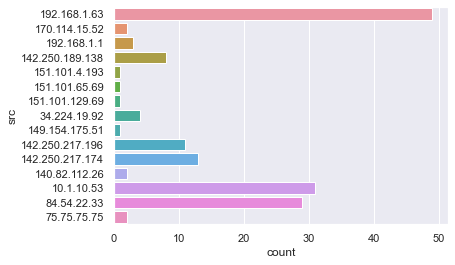

In [26]:
sns.countplot(
    data = df,
    y = 'src',
)

b. Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads recibidos en dichas direcciones. 

<AxesSubplot:xlabel='dst'>

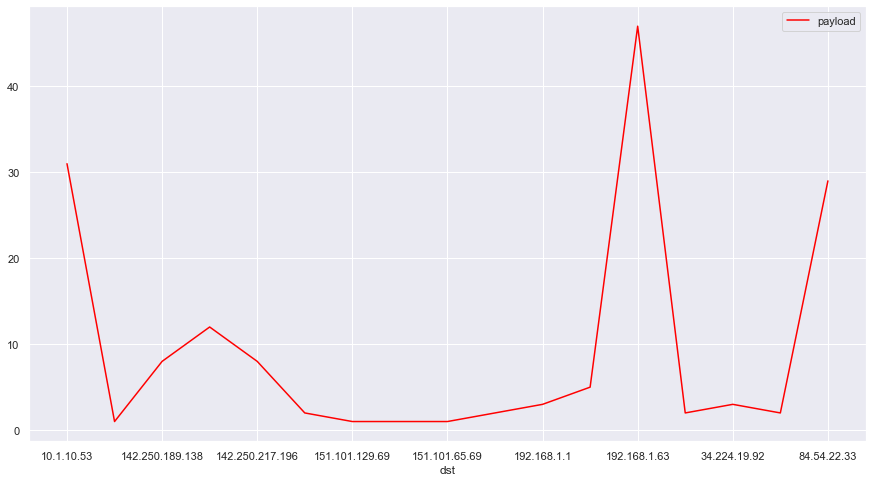

In [36]:
df.groupby('dst').count()['payload'].plot(legend=True, figsize=(15, 8),color='red')

c. Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los payloads enviados de dichos puertos. 

<AxesSubplot:xlabel='count', ylabel='sport'>

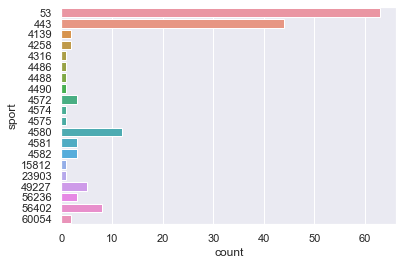

In [37]:
sns.countplot(
    data = df,
    y = 'sport',
)

d. Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los payloads recibidos en dichos puertos. 

<AxesSubplot:xlabel='dport'>

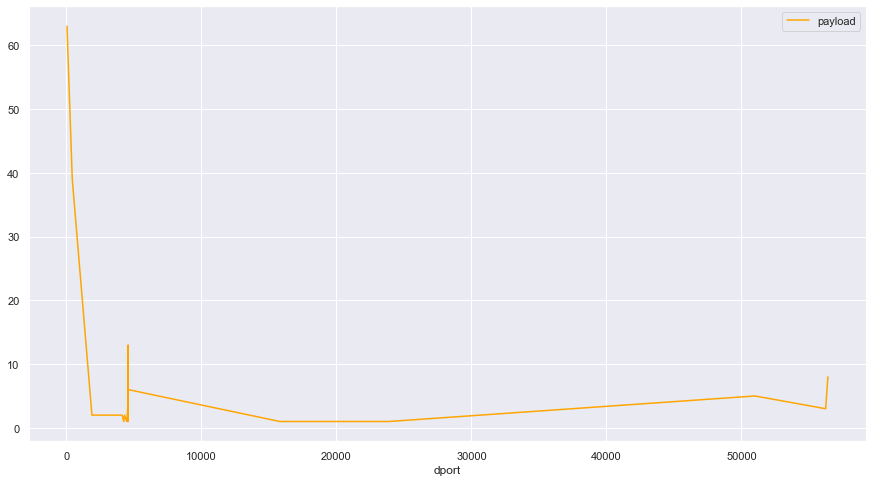

In [39]:
df.groupby('dport').count()['payload'].plot(legend=True, figsize=(15, 8), color='orange')

### Investigación del payload 

a. Cree un nuevo DF que incluya únicamente la conversación de la dirección IP origen más frecuente 

In [41]:
df_top = df[df['src'] == frq_srcadd]
df_top

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,184,257,788,DF,0,64,6,0,...,5,0,PA,33,13670,0,0,217,b'\x17\x03\x03\x00\xd4\r\xd8\xd2[\xf4\xc2>\xf9...,b'17030300d40dd8d25bf4c23ef91ba044aab7c7ea61ab...
3,4,5,0,77,24181,,0,64,17,0,...,None,None,None,None,33755,None,None,49,b'L6\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x...,b'4c360100000100000000000010636f6e74656e742d61...
4,4,5,184,40,789,DF,0,64,6,0,...,5,0,A,32,39976,0,None,0,b'',b''
6,4,5,184,1278,43569,DF,0,64,17,0,...,None,None,None,None,28958,None,None,1250,b'\xc5\x00\x00\x00\x01\x08\x87E\x0f\xfd\xcd\x9...,b'c5000000010887450ffdcd99d880004046004493d2e5...
7,4,5,0,102,43570,DF,0,64,17,0,...,None,None,None,None,3792,None,None,74,"b""\xd4\x00\x00\x00\x01\x08\x87E\x0f\xfd\xcd\x9...",b'd4000000010887450ffdcd99d880004039ea1dbfe491...
8,4,5,0,567,43571,DF,0,64,17,0,...,None,None,None,None,4257,None,None,539,b'\xd2\x00\x00\x00\x01\x08\x87E\x0f\xfd\xcd\x9...,b'd2000000010887450ffdcd99d88000420ae354de470a...
13,4,5,0,106,43572,DF,0,64,17,0,...,None,None,None,None,3796,None,None,78,b'\xe0\x00\x00\x00\x01\x08\x87E\x0f\xfd\xcd\x9...,b'e0000000010887450ffdcd99d88000403ddf351a2e48...
14,4,5,0,61,43573,DF,0,64,17,0,...,None,None,None,None,3751,None,None,33,"b""N\x87E\x0f\xfd\xcd\x99\xd8\x80\xef\xef\xd1\x...",b'4e87450ffdcd99d880efefd1fdbef3953700717a9ebd...
15,4,5,0,61,43574,DF,0,64,17,0,...,None,None,None,None,3751,None,None,33,b'W\x87E\x0f\xfd\xcd\x99\xd8\x80\x9du\xfe\x91\...,b'5787450ffdcd99d8809d75fe91a0ede85c6702c8632a...
18,4,5,0,63,43575,DF,0,64,17,0,...,None,None,None,None,3753,None,None,35,b'S\x87E\x0f\xfd\xcd\x99\xd8\x80)B\x18\x82\x1e...,b'5387450ffdcd99d880294218821eefd7f0b54974a109...


b. Obtenga un nuevo DF con las columnas Src Address, Dst Address y agrúpelas por payload 

In [45]:
df_payload = df_top .groupby(by = ['payload'])
df_payload = df_payload[['src', 'dst', 'payload']]
df_payload

In [47]:
df_payload.head()

,src,dst,payload
0,192.168.1.63,170.114.15.52,217
3,192.168.1.63,192.168.1.1,49
4,192.168.1.63,170.114.15.52,0
6,192.168.1.63,142.250.189.138,1250
7,192.168.1.63,142.250.189.138,74
8,192.168.1.63,142.250.189.138,539
13,192.168.1.63,142.250.189.138,78
14,192.168.1.63,142.250.189.138,33
15,192.168.1.63,142.250.189.138,33
18,192.168.1.63,142.250.189.138,35


c. Obtenga la IP que más ha intercambiado bytes con la IP más frecuente.  Esta IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.  

In [48]:
top_talks_to = df_top['dst'].unique()

In [49]:
top_talks_to

array(['170.114.15.52', '192.168.1.1', '142.250.189.138', '192.168.1.255',
       '151.101.4.193', '151.101.65.69', '151.101.129.69', '34.224.19.92',
       '149.154.175.51', '142.250.217.196', '142.250.217.174',
       '140.82.112.26', '239.255.255.250'], dtype=object)

In [51]:
df_top['dst'].value_counts()

142.250.217.174    12
142.250.189.138     8
142.250.217.196     8
192.168.1.255       5
34.224.19.92        3
192.168.1.1         3
149.154.175.51      2
239.255.255.250     2
170.114.15.52       2
151.101.65.69       1
151.101.4.193       1
140.82.112.26       1
151.101.129.69      1
Name: dst, dtype: int64

In [52]:
suspicious = top_talks_to[0]

In [53]:
suspicious

'170.114.15.52'

d. Cree un nuevo DF con la conversación entre la IP más frecuenta y la IP sospechosa. 

In [54]:
df_suss = df[(df['src'] == frq_srcadd) & (df['dst'] == suspicious)]

In [57]:
df_suss

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,184,257,788,DF,0,64,6,0,...,5,0,PA,33,13670,0,0,217,b'\x17\x03\x03\x00\xd4\r\xd8\xd2[\xf4\xc2>\xf9...,b'17030300d40dd8d25bf4c23ef91ba044aab7c7ea61ab...
4,4,5,184,40,789,DF,0,64,6,0,...,5,0,A,32,39976,0,None,0,b'',b''


###### e. Obtenga los payloads del DF del inciso 6, y añada cada uno en un array. 
###### f. Muestre el contenido del array. 

In [62]:
array_sus = df_suss['payload_raw'].to_numpy()

In [64]:
print(array_sus)

[b'\x17\x03\x03\x00\xd4\r\xd8\xd2[\xf4\xc2>\xf9\x1b\xa0D\xaa\xb7\xc7\xeaa\xab<\xfa\xed%{pR\xbd\xb5\x01\x15\x1d\xa3\xa0\xe3\xd0\xfaY\x95}\xb2\xf2\xe5\xb3\xca\xd7X\xe3\xdb]\x9f\xa1`\xf5O\xf0\x06_\xe4\x10\x0b\xf6\xb72\xc9:\xcf0\xe8\x8d\x9d;+\xcf\x12`\x18\xb8\x1c\xe6L\x84\xd3\xda\xa0F}=\x82.\x8f\xeb\x0e\xf5\xbb\xa7\x0b\x13\xd3y\xd9\xf0\xb4U\x90?\xc3\xb8\xe9\xc4\x16\xaa\x8b\xec\xc2\xe65\x13(*\xd0\x07x\x0c`t\xaa+\xfdyA!/\\\x8a\x15\x9fP,\xe4\xc3x\x00]\xab\xa7\xaf\xfavn\xa0\xe6\xdd\xfb\xea\xb2\xc3`$\xea\xf9\xe7,\x06\xca\x9f\x02\x93\xa70\xea\xe6\xfa}\xd3\xcbO^\'e\xc3"\xb5&i\xa6B\x1c\xd8\xc9\x13\xd4)\x91\x08?\xc7\x8f\xc2\xe5\xe5_\x86\xdabR\x1a.}\xe38\xc3G\xe5\x0e'
 b'']


g. Examine los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido que se envie a través del puerto explicado en el inciso f? 

In [68]:
df_suss[['payload', 'payload_raw', 'src', 'sport', 'dst', 'dport']]

,payload,payload_raw,src,sport,dst,dport
0,217,b'\x17\x03\x03\x00\xd4\r\xd8\xd2[\xf4\xc2>\xf9...,192.168.1.63,4139,170.114.15.52,443
4,0,b'',192.168.1.63,4139,170.114.15.52,443


La cantidad de datos obtenidos nos parece un poco extraña, pero luego de eso consideramos que lo obtenido tiene concordancia con los procesos que se realizaron previamente. 